# K-Means Clustering – Challenge: Uncovering Patterns in Basic1 Dataset

## Overview

In this notebook, we’ll explore the Basic1 dataset using unsupervised K-Means clustering. We will:

- Load and inspect the data  
- Preprocess and standardize features  
- Use the Elbow Method and Silhouette Analysis to choose the optimal number of clusters  
- Fit K-Means and visualize clusters in 2D with PCA  
- Examine the size and feature‐profiles of each cluster  

**Can we discover meaningful groupings in the Basic1 data based solely on its features?**

In [1]:
# %% [markdown]
# ## 1. Load & Inspect Data

# %%
import pandas as pd

# Load the dataset
df = pd.read_csv('Data/basic1.csv')

# Peek at the first rows and summary
display(df.head())
print("\nShape:", df.shape)
print("\nMissing values per column:\n", df.isna().sum())

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1



Shape: (9794, 3)

Missing values per column:
 x        0
y        0
color    0
dtype: int64


In [2]:
# %% [markdown]
# ## 2. Preprocessing

# %%
from sklearn.preprocessing import StandardScaler

# Assume all columns are numeric; if not, drop or encode non-numerics here
X = df.select_dtypes(include=['int64','float64']).copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

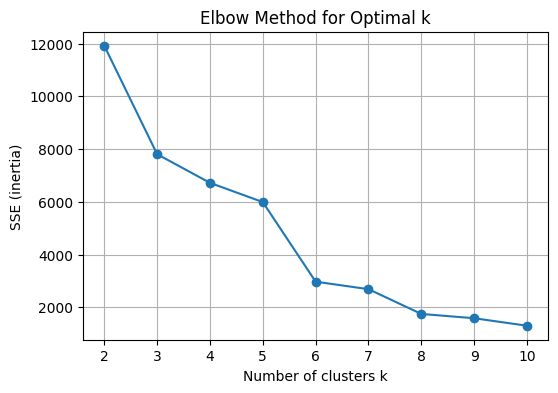

In [3]:
# %% [markdown]
# ## 3. Determine Optimal Number of Clusters

# %% [markdown]
# ### 3.1 Elbow Method

# %%
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('SSE (inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

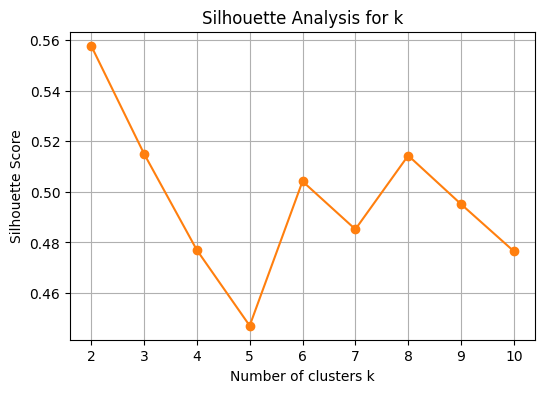

In [4]:
# %% [markdown]
# ### 3.2 Silhouette Analysis

# %%
from sklearn.metrics import silhouette_score

sil_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, '-o', color='tab:orange')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for k')
plt.grid(True)
plt.show()

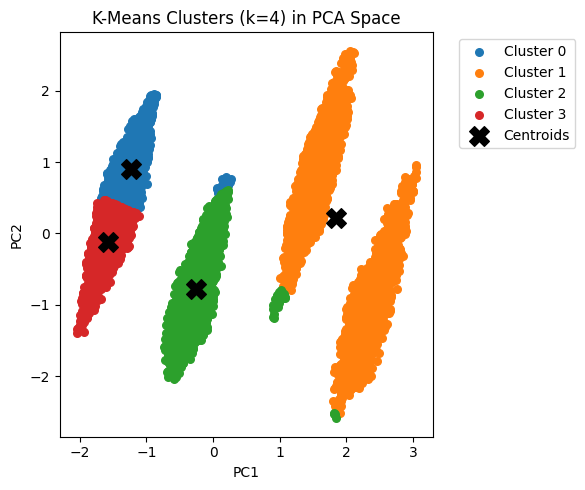

In [5]:
# %% [markdown]
# ## 4. Fit K-Means & Visualize

# %%
from sklearn.decomposition import PCA

# Choose k based on the above (for example, k=4)
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 2D visualization via PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

import seaborn as sns

plt.figure(figsize=(6,5))
palette = sns.color_palette('tab10', k_opt)
for i in range(k_opt):
    idx = cluster_labels == i
    plt.scatter(X_pca[idx,0], X_pca[idx,1], s=30, color=palette[i], label=f'Cluster {i}')
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], 
            marker='X', s=200, color='black', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-Means Clusters (k={k_opt}) in PCA Space')
plt.legend(bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

Cluster counts:
 Cluster
0    1796
1    3309
2    2637
3    2052
Name: count, dtype: int64


Cluster,0,1,2,3
x,102.541301,413.551832,255.194518,99.798994
y,271.413588,298.702727,142.693229,165.608785
color,0.017817,2.354186,1.010239,0.000000


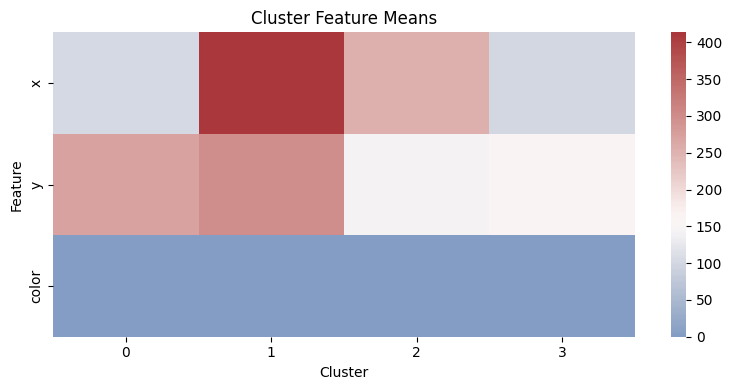

In [6]:
# %% [markdown]
# ## 5. Cluster Characteristics

# %%
# Attach cluster labels to original DataFrame
df_clusters = df.copy()
df_clusters['Cluster'] = cluster_labels

# Show cluster sizes
print("Cluster counts:\n", df_clusters['Cluster'].value_counts().sort_index())

# Compute feature means per cluster
cluster_means = df_clusters.groupby('Cluster').mean().T
display(cluster_means)

# Optionally, heatmap of standardized cluster profiles
plt.figure(figsize=(8,4))
sns.heatmap(cluster_means, cmap='vlag', center=df.mean().mean())
plt.title('Cluster Feature Means')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
